# Final Project | `Skin-Scout`

Batch        : FTDS-BSD-006

Group        : 3

Team members : 
- Achmad Abdillah Ghifari : Data Analyst
- Celine Clarissa         : Data Scientist
- Evan Juanto             : Data Engineer

HuggingFace      : [Skin-Scout Deployment Link](https://huggingface.co/spaces/celineclarissa/Skin-Scout)

Original Dataset : [Original Dataset Link](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

Team GitHub      : [GitHub Link](https://github.com/FTDS-assignment-bay/p2-final-project-ftds-006-bsd-group-006)

---
---

## i. Introduction

Before we start loading the data, we must define the background and problem statement that can help us answer the problems in the data. In this introduction part, the background will explain why we are using this dataset and the problem statement will explain what problem we want to solve in the data.

### i.1. Background

The current skincare market is flooded with countless products each with unique ingredients and highlights. Consumers often struggle to decide which product most consumer recommend due to the large amount of reviews for each different products, making reading to all the review traditionally wasting too much time and effort. While other metrics such as star rating is present on most skincare website, relying on only star rating to rate the quality of a product is unreliable as research has shown that star rating has many problem such as negativity bias where one negative aspect could lead to users leading a low star despite excelling in other area and also sometime the review and star a user give has discreptancy with some research finding only a moderate correlation between review and star rating. Hence, consumers are left to go through multiple reviews in order to get an accurate insight regarding certain skincare product. Due to this factor our teams goal is to create an application where we could make this process easier by finding out whether a certain user will recommend or not recommend a product based on their review.

### i.2. Problem Statement and Objective

We want to create an application that utilizes Natural Language Processing (NLP) and a recommender system in order to help predict whether a customer will recommend a product or not and also to give recommendation of similar skincare product. Our goal is to create a model with an F1-Score of 80%. This is done by using model such as SVC and cosine similarity in order to create the model. By creating this model, our objective is to make the process of finding the perfect skincare product more time-efficient and less frustrating.

---
---

## ii. Import Libraries

The following are the libraries used in the making of our group's Review Classification (NLP) model.

In [1]:
# Import libraries
import pandas as pd
import re

# Import for Feature Engineering
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Import for Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Import for Model Evaluation & Hyperparameter Tuning
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import for Model Saving
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
---

## iii. Data Loading

Data contains information about skincare products on the beauty e-commerce Sephora.

Data was obtained from [kaggle.com](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews), and then merged. Our Data Engineer processed the data with Airflow and obtained the cleaned dataset.

In [2]:
df_ori = pd.read_csv('finalproject_clean.csv')
df_ori.head()

rating  is_recommended  helpfulness  total_feedback_count  \
0       5             1.0          1.0                     0   
1       5             1.0          1.0                     0   
2       4             1.0          0.0                     1   
3       4             1.0          1.0                     0   
4       5             1.0          1.0                     0   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                       0.0                         0      2020-04-05   
1                       0.0                         0      2017-11-15   
2                       1.0                         0      2018-02-16   
3                       0.0                         0      2019-09-12   
4                       0.0                         0      2021-09-03   

                                         review_text    skin_tone eye_color  \
0  I’m very impressed with the price and how well...         fair     green   
1  Just picked up this product to replace my curr...          tan     brown   
2  stops future breakouts from happening! The por...       medium     brown   
3  First positive impression is how smooth and so...  lightMedium     brown   
4  This smells incredible! It really brightens my...  lightMedium      blue   

   ...                                        ingredients limited_edition  \
0  ...  ['Water, Butylene Glycol, Glycerin, Sodium Hya...               0   
1  ...  ['Diisostearyl Malate, Hydrogenated Polyisobut...               0   
2  ...  ['Aqua (Water), Niacinamide, Pentylene Glycol,...               0   
3  ...  ['Water, Glycerin, Alcohol Denat., Dipropylene...               0   
4  ...  ['Alcohol Denat., Fragrance (Parfum), Benzyl C...               0   

   new online_only  out_of_stock  sephora_exclusive  \
0  0.0         0.0           0.0                1.0   
1  0.0         0.0           0.0                1.0   
2  0.0         0.0           0.0                0.0   
3  0.0         0.0           0.0                0.0   
4  0.0         1.0           0.0                1.0   

                                          highlights      secondary_category  \
0  ['Good for: Dullness/Uneven Texture', 'Hyaluro...              Treatments   
1  ['allure 2019 Best of Beauty Award Winner', 'C...  Lip Balms & Treatments   
2  ['Vegan', 'Community Favorite', 'Oil Free', 'W...              Treatments   
3  ['allure 2019 Best of Beauty Award Winner', 'C...               Cleansers   
4  ['Vegan', 'Unisex/ Genderless Scent', 'Woody &...                Wellness   

   tertiary_category child_count  
0        Face Serums         0.0  
1       Moisturizers         3.0  
2        Face Serums         1.0  
3             Toners         0.0  
4  Holistic Wellness         0.0  

[5 rows x 31 columns]

In [3]:
df = df_ori.copy()

---
---

## iv. Feature Engineering

### iv.1. Drop Unused Columns

In this process, we will drop redundant columns, keeping only the ones used for NLP modelling: 'is_recommended' as the label, 'review_text' as the feature.

In [4]:
# Show column names
df.columns

Index(['rating', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'skin_tone', 'eye_color', 'skin_type',
       'hair_color', 'product_name', 'brand_name', 'price_usd', 'brand_id',
       'loves_count', 'reviews', 'size', 'variation_type', 'variation_value',
       'ingredients', 'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'secondary_category',
       'tertiary_category', 'child_count'],
      dtype='object')

In [5]:
# Drop columns that are not used for modelling
df.drop(columns=['product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'secondary_category', 'child_count', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'helpfulness', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'size', 'variation_type', 'variation_value', 'ingredients', 'tertiary_category', 'highlights'], inplace=True)

In [6]:
# Show columns in dataframe after dropping
df.columns

Index(['is_recommended', 'review_text'], dtype='object')

---

### iv.2. Text Preprocessing

In the next process, we will do text preprocessing for column 'review_text'.

The process of counting the number of sentences and words is for the purpose of checking whether the text preprocessing is a success or not.

In [7]:
# Count sentences and words in 'review_text' column
df['sentence_count'] = df['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['word_count'] = df['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [8]:
# Show number of sentences and words
print('Average Number of Sentences:', df['sentence_count'].mean())
print('Average Number of Words:', df['word_count'].mean())

Average Number of Sentences: 4.462045130105938
Average Number of Words: 70.17658844448897


After counting the number of sentences and words, we will proceed to the text preprocessing step.

Text preprocessing is done to minimize the number of vocabularies in text so that it is clean and ready for analysis, as well as modelling. The steps in text preprocessing for this project are:
- **Case folding:** change text to the same case (in this project, lowercase). As an example, the word 'yes' can be written as 'Yes' and 'yes', but both have the same meaning.
- **Remove numbers and symbols:** Unlike communicating as humans, in Natural Language Procesisng (NLP), numbers and punctuation are not significant. So, they are removed to simplify the dataset.
- **Remove whitespace**
- **Tokenization:** splitting words into tokens. In tokenization, a single word, number, or symbol is considered as one token.
- **Remove stopwords:** words that frequently occur or have insignificant meaning are removed from the list of tokens so that the tokens remaining are tokens that are significant to differentiating texts. Doing this can reduce the dimensionality of the dataset.
- **Lemmatization:** converting words back to their root form. As an example, the words 'driving' and 'drive' have similar meaning. So, the word 'driving' is converted to 'drive' to reduce dimensionality.

In [9]:
# Define stopwords
stopwords_eng = stopwords.words('english')

# Add words that frequently occur in all skincare reviews to stopwords
stopwords_eng.append('face')
stopwords_eng.append('product')
stopwords_eng.append('skin')
stopwords_eng.append('use')
stopwords_eng.append('using')
stopwords_eng.append('used')
stopwords_eng.append('really')

In [10]:
# Create text preprocessing function
def text_preprocessing(text):
  '''
  This function is created to do text preprocessing: change text to lowercase, remove numbers, punctuation symbols,
  stopwords, whitespace, lemmatize text, and tokenize text. Text preprocessing can be done just by calling this function.
  '''
  # Case folding: change text to lowercase
  text = text.lower()

  # Remove numbers
  text = re.sub(r'\d+', '', text)

  # Remove symbols
  ## Remove comma
  text = text.replace(',', '')
  ## Remove period symbol
  text = text.replace('.', '')
  ## Remove exclamation mark
  text = text.replace('!', '')
  ## Remove question mark
  text = text.replace('?', '')
  ## Remove quotation mark
  text = text.replace('"', '')
  text = text.replace("'", '')
  text = text.replace('’', '')
  ## Remove hyphen
  text = text.replace('-', ' ')
  text = text.replace('—', ' ')
  ## Remove ampersand
  text = text.replace('&', 'and')

  # Remove whitespace
  text = text.strip()

  # Tokenization
  tokens = word_tokenize(text)

  # Remove stopwords
  tokens = [word for word in tokens if word not in stopwords_eng]

  # Lemmatization: minimize words with same or similar meaning
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Combine tokens
  text = ' '.join(tokens)

  return text

In [11]:
# Apply text_preprocessing function to data
df['text_processed'] = df['review_text'].apply(lambda x: text_preprocessing(x))
df

is_recommended                                        review_text  \
0                 1.0  I’m very impressed with the price and how well...   
1                 1.0  Just picked up this product to replace my curr...   
2                 1.0  stops future breakouts from happening! The por...   
3                 1.0  First positive impression is how smooth and so...   
4                 1.0  This smells incredible! It really brightens my...   
...               ...                                                ...   
39924             1.0  My hubby hates sunscreen because of the way it...   
39925             1.0  I have only heard good things about this and c...   
39926             0.0  I received a sample sachet size of this produc...   
39927             0.0  my skin is combination in winter and more oily...   
39928             1.0  I used this for four weeks using a hoard of sa...   

       sentence_count  word_count  \
0                   2          25   
1                   2          39   
2                   2          21   
3                   5          62   
4                   4          25   
...               ...         ...   
39924               6          81   
39925               2          34   
39926               5         103   
39927               2          21   
39928               5         101   

                                          text_processed  
0              im impressed price well work radiant soft  
1      picked replace current lip treatment say wow l...  
2      stop future breakout happening pore nose defin...  
3      first positive impression smooth soft toner fe...  
4      smell incredible brightens mood feel like im o...  
...                                                  ...  
39924  hubby hate sunscreen way feel tolerates pale h...  
39925  heard good thing finally confirm good everyone...  
39926  received sample sachet size exchange review ho...  
39927    combination winter oily summer cleaner dry even  
39928  four week hoard sample deluxe size good saw vi...  

[39929 rows x 5 columns]

Now, we will check by counting the number of sentences and words in column 'text_processed'.

In [12]:
# Count sentences and words in 'text_processed' column after text preprocessing
df['sentence_count_processed'] = df['text_processed'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['word_count_processed'] = df['text_processed'].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
# Show number of sentences and words after text preprocessing
print('Average Number of Sentences:', df['sentence_count_processed'].mean())
print('Average Number of Words:', df['word_count_processed'].mean())

Average Number of Sentences: 1.0
Average Number of Words: 27.92661975005635


It can be seen that the average number of sentences is reduced from 4.4 to 1. The average number of words is also reduced from 70 to 31. This shows that the text preprocessing step is successful. So, we can proceed to the next step.

---

### iv.3. Split Data

In this step, we will split the data into x_train, x_test, y_train, and y_test. 'x' is the feature (preprocessed text) and 'y' is the label (whether the review recommends the product or not). Training data is used to train the model. Meanwhile, testing data is used to check the model's performance on unseen data.

In [14]:
# Show unique values in 'is_recommended' column
df['is_recommended'].unique()

array([1., 0.])

In [15]:
# Split data to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(df.text_processed, df.is_recommended, test_size = 0.2, random_state = 12, stratify = df.is_recommended)

# Check data shape
print('Training Data Size:', x_train.shape[0])
print('Testing Data Size:', x_test.shape[0])

Training Data Size: 31943
Testing Data Size: 7986


In [16]:
# Change data type of y to integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

---

### iv.4. Text Vectorization

Now, we will generate vectors from the preprocessed text with CountVectorizer. The way CountVectorizer works is by counting the number of occurance of tokens in the text. Simply put, it calculates the frequency of words in the text and generates vectors with it.

In [17]:
# Get vocabularies
Vectorize = CountVectorizer()
Vectorize.fit(x_train)

CountVectorizer()

---
---

## v. Model Definition

After the Feature Engineering process, we will now start with modelling. First, we choose which model algorithm to choose with cross-validation process. Cross-validation is a process done to determine which model algoritmn to use based on its performance in default parameters. The performance of each model algorithm is measured with F1-Score metric, considering that the data is imbalanced.

But before that, we will elaborate the model algorithms that we will use in cross-validation.
| Model Algorithm | Reason Used by Data Scientist|
| :---: | :---: |
| Logistic Regression | Logistic Regression is easy to implement and understand. Regularization can also be used if overfitting occurs (typically when handling high-dimensional data).  |
| SVC | SVC can be used for high-dimensional and non-linear data. |
| Decision Tree | Decision Tree is simple, easy to understand, and can be used for non linear data. |
| Random Forest | Random Forest is an implementation of Decision Tree, but its results are aggregated. So, it is simple, easy to understand, and can be used for non linear data as well. It also can reduce variance. |
| AdaBoost | AdaBoost is efficient and has high accuracy. |
| GradientBoost | GradientBoost has high accuracy and it can handle complex data. GradientBoost can reduce bias error in model, which can also minimize overfitting or underfitting. |
| XGBoost | XGBoost works well on imbalanced data. |

In [18]:
# Define models using pipeline
logreg = make_pipeline(Vectorize, LogisticRegression())
svc = make_pipeline(Vectorize, SVC())
dectree = make_pipeline(Vectorize, DecisionTreeClassifier())
rf = make_pipeline(Vectorize, RandomForestClassifier())
ada = make_pipeline(Vectorize, AdaBoostClassifier())
gradient = make_pipeline(Vectorize, GradientBoostingClassifier())
xgb = make_pipeline(Vectorize, XGBClassifier())

In [19]:
# Calculate cross validation score for each model using F1-Score metric
logreg_cv = cross_val_score(logreg, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
svc_cv = cross_val_score(svc, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
dectree_cv = cross_val_score(dectree, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
rf_cv = cross_val_score(rf, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
ada_cv = cross_val_score(ada, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
gradient_cv = cross_val_score(gradient, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
xgb_cv = cross_val_score(xgb, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)

In [20]:
# Looping to find best model
for cv, name in zip([logreg_cv, svc_cv, dectree_cv, rf_cv, ada_cv, gradient_cv, xgb_cv],
                    ['logreg', 'svc', 'dectree', 'rf', 'ada', 'gradient', 'xgb']):
    print(name)
    print(f'F1-Score - ALL - Cross Validation: {cv}')
    print(f'F1-Score - Mean - Cross Validation: {cv.mean()}')
    print(f'F1-Score - std - Cross Validation: {cv.std()}')
    print(f'F1-Score - Range - Cross Validation: {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*50)
    print('')

logreg
F1-Score - ALL - Cross Validation: [0.94419762 0.9476584  0.94562228 0.94498095 0.94562815]
F1-Score - Mean - Cross Validation: 0.9456174810572527
F1-Score - std - Cross Validation: 0.0011477521652324596
F1-Score - Range - Cross Validation: 0.9444697288920203 - 0.9467652332224852
--------------------------------------------------

svc
F1-Score - ALL - Cross Validation: [0.94625336 0.94486824 0.94648278 0.94546399 0.94526243]
F1-Score - Mean - Cross Validation: 0.9456661606327479
F1-Score - std - Cross Validation: 0.0006086431596850412
F1-Score - Range - Cross Validation: 0.9450575174730629 - 0.9462748037924329
--------------------------------------------------

dectree
F1-Score - ALL - Cross Validation: [0.91416771 0.91336745 0.91340982 0.91146302 0.9157424 ]
F1-Score - Mean - Cross Validation: 0.9136300805800985
F1-Score - std - Cross Validation: 0.0013830815705190539
F1-Score - Range - Cross Validation: 0.9122469990095795 - 0.9150131621506176
----------------------------------

From the cross-validation process, it can be seen that SVC obtained the highest average F1-Score of 94.566%. Therefore, SVC model algorithm will be used in the next steps.

---
---

## vi. Model Training

In [21]:
# Train SVC model
model_nlp = svc.fit(x_train, y_train)
model_nlp

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

---
---

## vii. Model Evaluation

After training process, we will evaluate the performance of the model and attempt to increase its performance.

### vii.1. Evaluate Model Performance

Now, we will do an evaluation on the model's performance on training and testing data.

In [22]:
# Predict label using best model (default parameters)
y_pred_train_svc = model_nlp.predict(x_train)
y_pred_test_svc = model_nlp.predict(x_test)

F1-Score - Train Set (Before) :  0.9764447124764979 

Confusion Matrix (Before)     : 


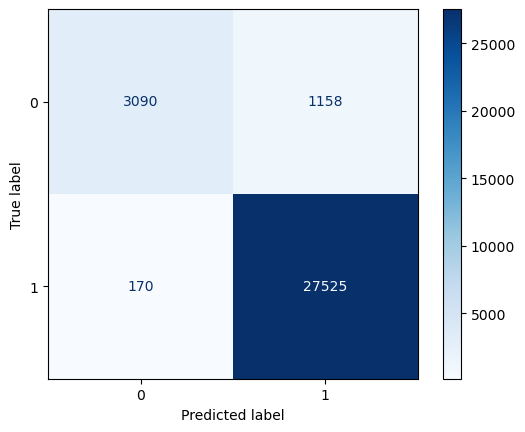

In [23]:
# Show confusion matrix for train data before tuning
print('F1-Score - Train Set (Before) : ', f1_score(y_train, y_pred_train_svc), '\n')
print('Confusion Matrix (Before)     : \n', ConfusionMatrixDisplay.from_estimator(model_nlp, x_train, y_train, cmap='Blues'))

F1-Score - Test Set (Before) :  0.9461976922007508 

Confusion Matrix (Before)     : 


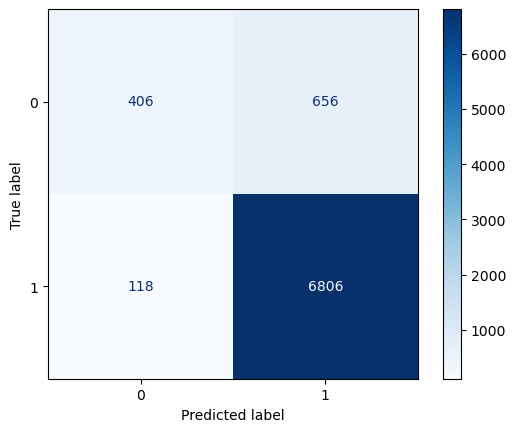

In [24]:
# Show confusion matrix for test data before tuning
print('F1-Score - Test Set (Before) : ', f1_score(y_test, y_pred_test_svc), '\n')
print('Confusion Matrix (Before)     : \n', ConfusionMatrixDisplay.from_estimator(model_nlp, x_test, y_test, cmap='Blues'))

In [25]:
all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate confusion matrix for the test set
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    score_reports = {
        'train - f1_score': f1_score(y_train, y_pred_train),
        'test - f1_score': f1_score(y_test, y_pred_test),
        'test - false positive': int(fp_test),
        'test - false negative': int(fn_test),
    }
    all_reports[name] = score_reports
    return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, 'Baseline (Default Parameters)')
pd.DataFrame(all_reports)

Baseline (Default Parameters)
train - f1_score                            0.976445
test - f1_score                             0.946198
test - false positive                     656.000000
test - false negative                     118.000000

From the table above, it can be seen that the model performs well, even with default parameters. It has quite high F1 scores for both training and testing sets (train: 97.64%, test: 94.61%). Other than that, the number of false predictions of 774 is quite low, considering that the total for test set is 7986. The model is also a good fit, considering that difference in the model's performance in training and testing sets is 3.03%.

---

### vii.2. Hyperparameter Tuning

Even though the model already has good performance with default parameters, we will attempt to increase its performance with Hyperparameter Tuning, specifically using GridSearch. The way it works is by setting a set of parameters we want to try. Then, it will try combinations of parameters and determine the best parameters to use.

In [26]:
# Define parameters for GridSearch
svc_grid_search_params = {
    'svc__kernel': ['rbf', 'sigmoid', 'linear'],
    'svc__C': [0.01, 0.1, 1],
    'svc__gamma': [0.01, 0.1, 1]
}

In [27]:
# Tuning with GridSearch to find best model
svc_grid = GridSearchCV(estimator=svc,
                        param_grid=svc_grid_search_params,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='f1')

svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='f1', verbose=2)

In [28]:
# Get parameters for best model
svc_grid.best_params_

{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}

In [29]:
# Define best model
Final_Project_Model_NLP = svc_grid.best_estimator_
Final_Project_Model_NLP

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('svc', SVC(C=0.1, gamma=0.01, kernel='linear'))])

---

### vii.3. Evaluate Model Performance After Tuning

Now, we will do an evaluation on the model's performance after Hyperparameter Tuning and compare it with the model's performance before tuning.

In [30]:
# Use best model to predict label
y_pred_test = Final_Project_Model_NLP.predict(x_test)
y_pred_train = Final_Project_Model_NLP.predict(x_train)

F1-Score - Train Set (After) :  0.9648623317830554 

Confusion Matrix (After)     : 


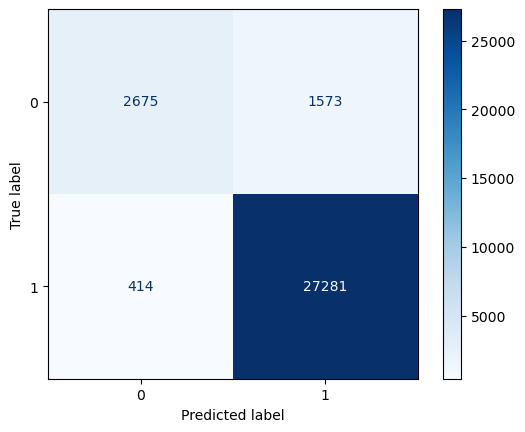

In [31]:
# Show confusion matrix for train data after tuning
print('F1-Score - Train Set (After) : ', f1_score(y_train, y_pred_train), '\n')
print('Confusion Matrix (After)     : \n', ConfusionMatrixDisplay.from_estimator(Final_Project_Model_NLP, x_train, y_train, cmap='Blues'))

F1-Score - Train Set (After) :  0.9488608309233265 

Confusion Matrix (After)     : 


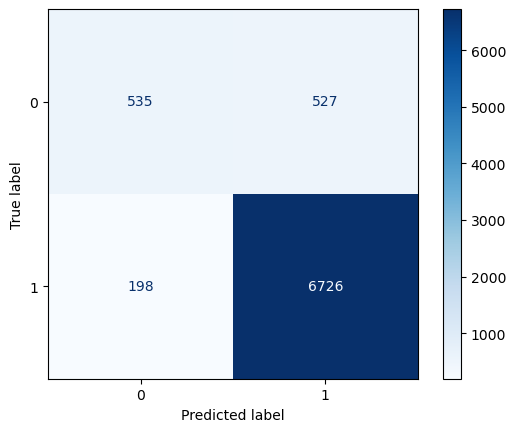

In [32]:
# Show confusion matrix for test data after tuning
print('F1-Score - Train Set (After) : ', f1_score(y_test, y_pred_test), '\n')
print('Confusion Matrix (After)     : \n', ConfusionMatrixDisplay.from_estimator(Final_Project_Model_NLP, x_test, y_test, cmap='Blues'))

In [33]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Grid Search Hyperparameter)')
pd.DataFrame(all_reports)

Baseline (Default Parameters)  \
train - f1_score                            0.976445   
test - f1_score                             0.946198   
test - false positive                     656.000000   
test - false negative                     118.000000   

                       Baseline (Grid Search Hyperparameter)  
train - f1_score                                    0.964862  
test - f1_score                                     0.948861  
test - false positive                             527.000000  
test - false negative                             198.000000

***From the table above, it can be seen that the model's performance has improved after tuning.*** It can be seen by:
- Although the F1 Score for training set is reduced by 1.16%, the F1 Score for testing set increased by 0.27%. The difference in F1 Score between training and testing sets is reduced from 3.03% to 1.6%. This means that ***the model is more of a good fit*** now after Hyperparameter Tuning.
- The reduced number of False Positive predictions from 656 to 527 (difference of 129 predictions). Even though the False Negative predictions increased from 118 to 198 (difference of 80 predictions), ***the total number of false predictions decreased*** from 774 to 725.

---

### vii.3. Compare True and False Predictions

In [34]:
# Create table to evaluate and analyze data
eval = pd.DataFrame(x_test)
eval['label'] = y_test
eval['prediction'] = y_pred_test
eval

text_processed  label  prediction
6550   great non irritating area around eye ; retinol...      1           1
25792  cream thick soak right leaf feeling moisturize...      1           1
13966  stuff never imagined looking glowy hydrated st...      1           1
16101  great reducing appearance swelling redness puf...      1           1
27262  hesitant getting hate expensive drunk elephant...      1           1
...                                                  ...    ...         ...
24236  im acne medication important hesitated alot de...      1           1
6785   like travel duo great ( cost effective ) way t...      1           1
14616  like lot supergoops tinted spf prior okay woul...      1           1
37210                         go remover take everything      1           1
30999  regret buying excited try many good review eve...      0           1

[7986 rows x 3 columns]

In [35]:
# Create dictionary for visualization purposes
dict_class = {0: 'Not Recommended',
              1: 'Recommended'}

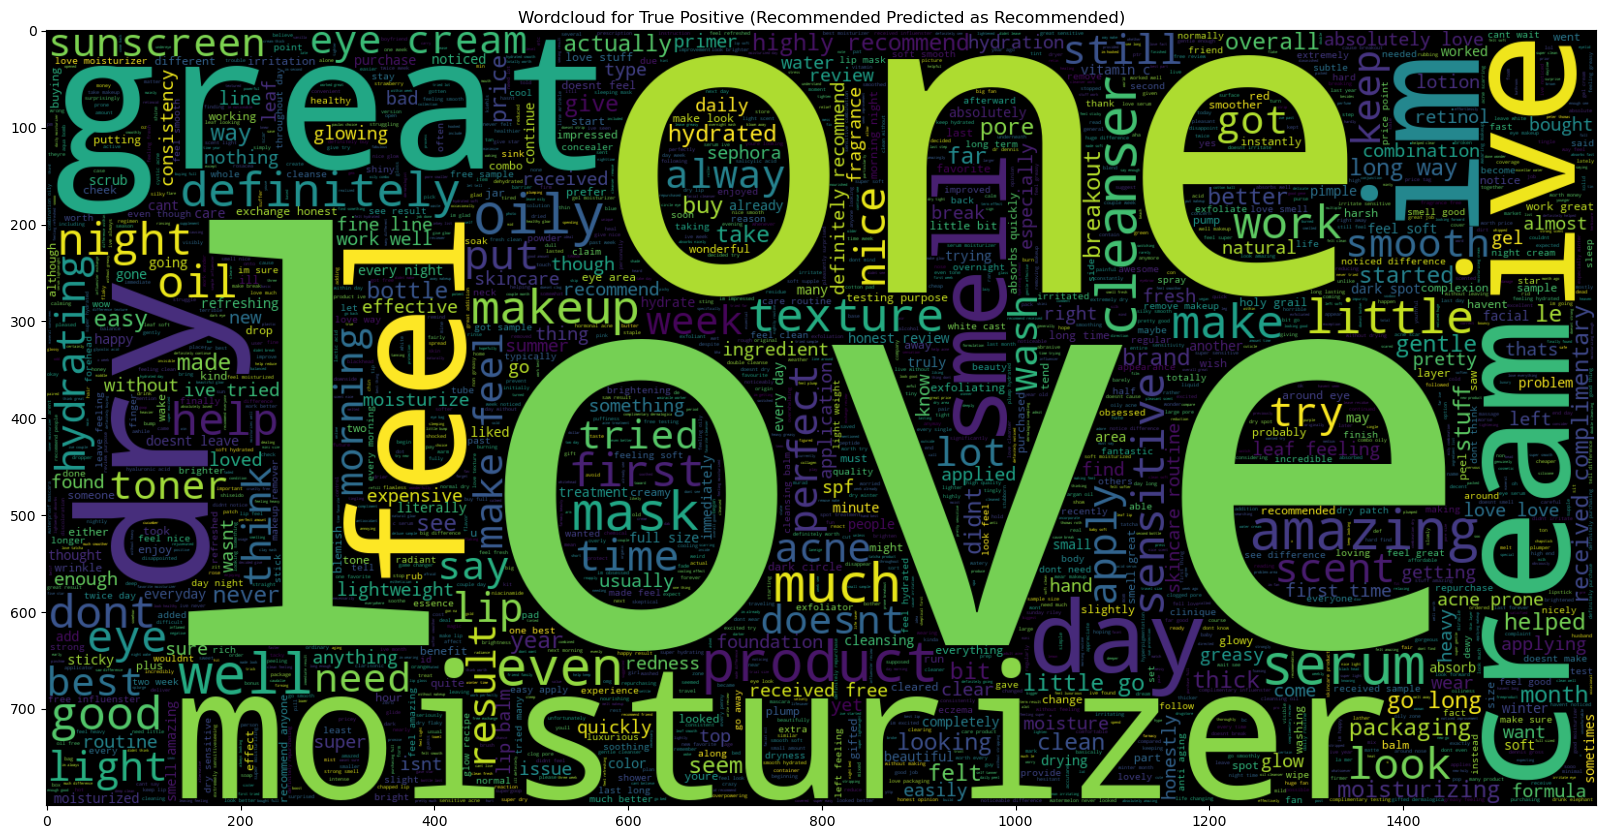

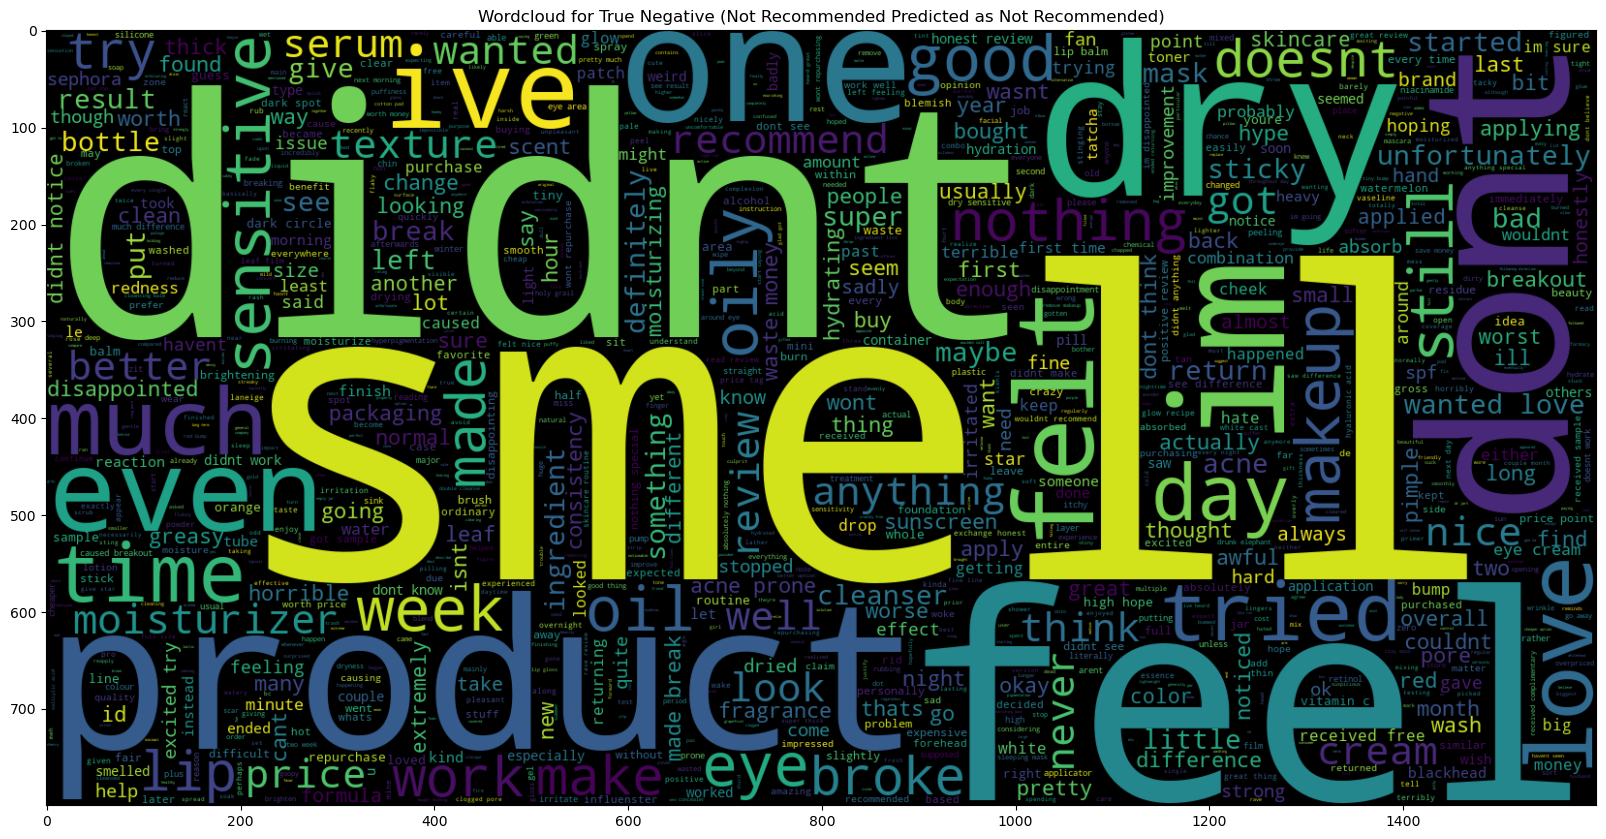

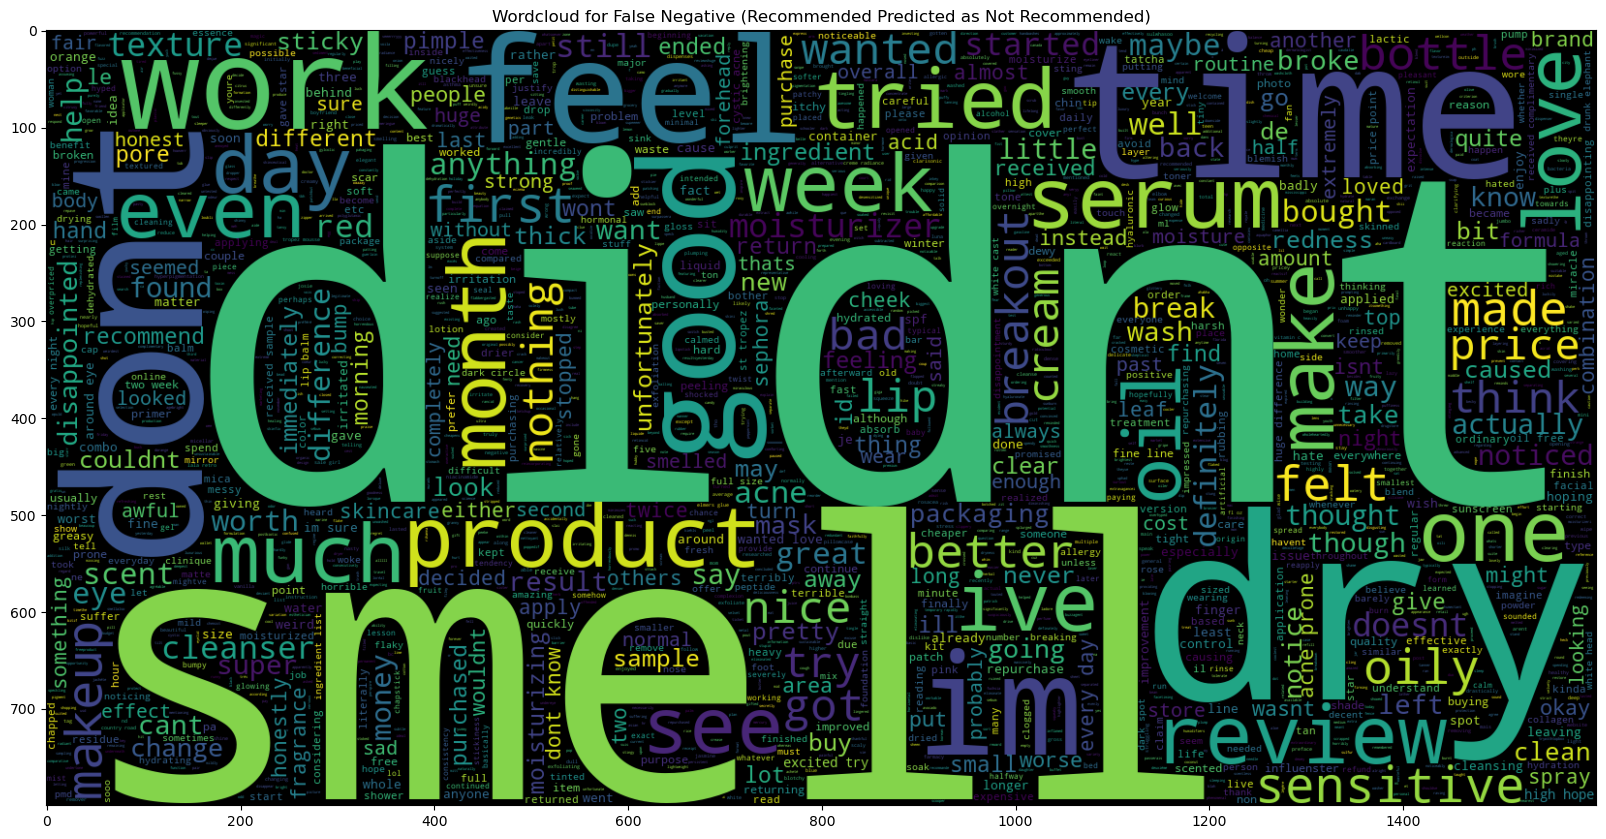

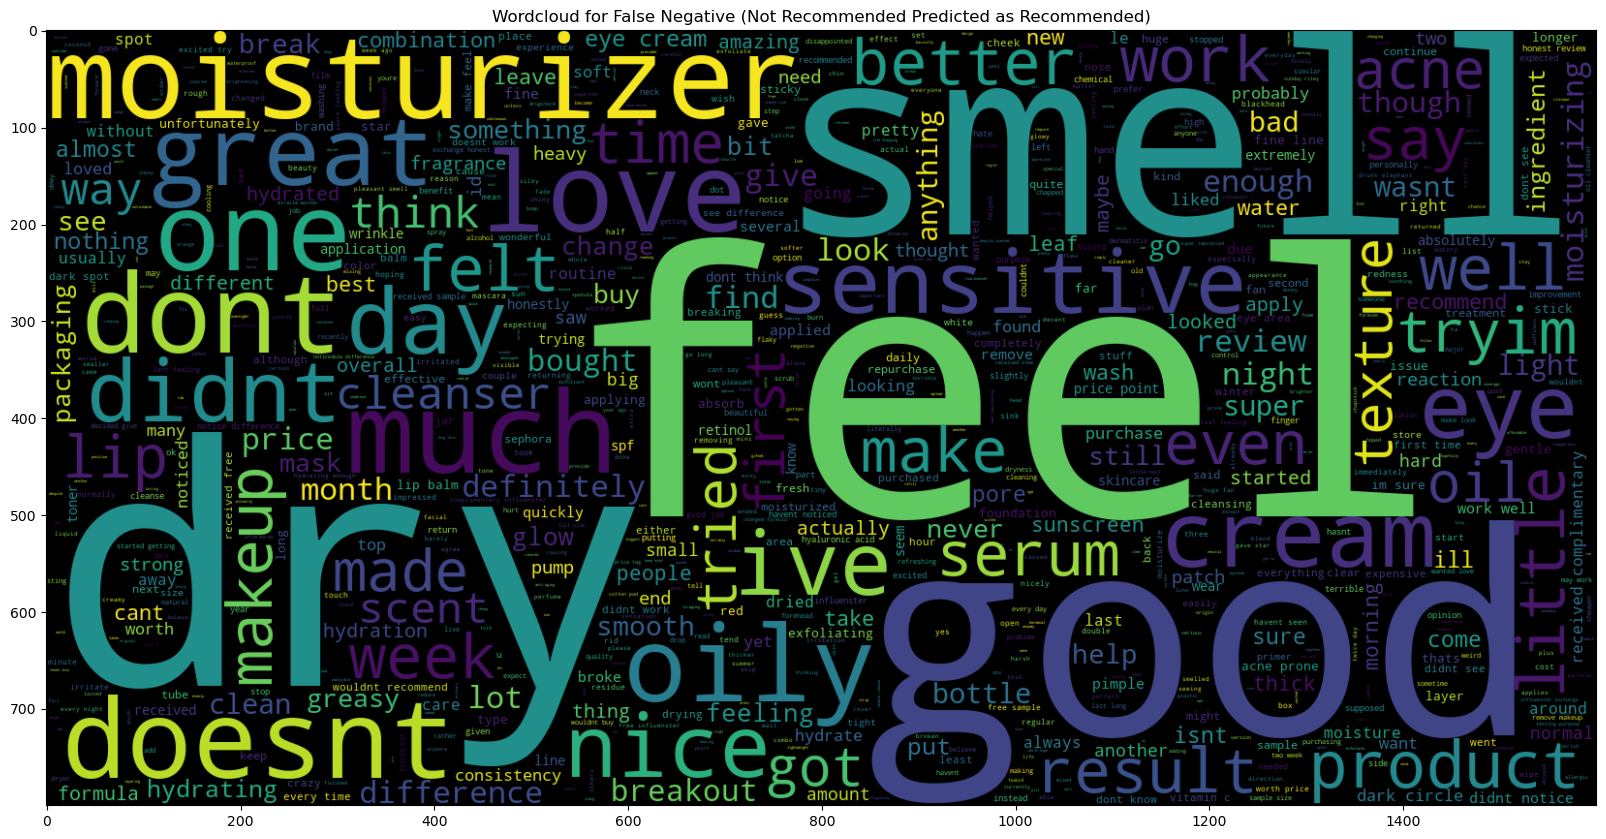

In [36]:
# Show WordClouds

# Create wordcloud for true positive
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(eval.loc[(eval.label == 1) & (eval.prediction == 1), 'text_processed']))
plt.title(f'Wordcloud for True Positive ({dict_class[1]} Predicted as {dict_class[1]})')
plt.imshow(wc , interpolation = 'bilinear')

# Create wordcloud for true negative
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(eval.loc[(eval.label == 0) & (eval.prediction == 0), 'text_processed']))
plt.title(f'Wordcloud for True Negative ({dict_class[0]} Predicted as {dict_class[0]})')
plt.imshow(wc , interpolation = 'bilinear')

# Create wordcloud for false negative
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(eval.loc[(eval.label == 1) & (eval.prediction == 0), 'text_processed']))
plt.title(f'Wordcloud for False Negative ({dict_class[1]} Predicted as {dict_class[0]})')
plt.imshow(wc , interpolation = 'bilinear')

# Create wordcloud for false positive
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(eval.loc[(eval.label == 0) & (eval.prediction == 1), 'text_processed']))
plt.title(f'Wordcloud for False Negative ({dict_class[0]} Predicted as {dict_class[1]})')
plt.imshow(wc , interpolation = 'bilinear')

From the WordClouds above, it can be seen that:
- The model classifies reviews that have negative words such as "smell" and "didnt" as "not recommended". As a result, review that actually recommends product but uses many negative words got classified as "not recommended".
- The model classifies reviews that have positive words such as "love", "good", and "great" as "recommended". Although False Negative predictions have positive words, it also contains lots of negative words, such as "dry", "didnt", and "doesnt". 

---
---

## viii. Model Saving

We will now save the model in a pickle file.

In [37]:
# Save best model
with open('Final_Project_Model_NLP.pkl', 'wb') as file_1:
  pickle.dump(Final_Project_Model_NLP, file_1)

---
---

## xi. Model Inference

Model Inference process is done in another file named `Final_Project_Inference_NLP.ipynb`.

---
---

## xii. Conclusion

### xii.1. Model Strengths and Weaknesses

#### xii.1.a. Strengths

- ***The model can make accurate predictions.*** This can be seen from the F1-Score for training set of 96% and F1-Score for testing set of 94%. The range of F1-Score is from 0% to 100%. So, the F1-Score obtained from model is considered quite high. As an addition, the obtained F1-Score from model exceeds the expected scores stated in this project's objective, which is 80%.
- The model is a good fit, which means that ***the model is quite consistent in making predictions***, even for unseen data. This can be seen from the difference in F1-Score's for training and testing set of 1.6%

#### xii.1.b. Weaknesses

The model still made some false predictions. Below is the analysis for the false predictions. 

- The model classifies reviews that have negative words such as "smell" and "didnt" as "not recommended". As a result, review that actually recommends product but uses many negative words got classified as "not recommended".
- The model classifies reviews that have positive words such as "love", "good", and "great" as "recommended". Although False Negative predictions have positive words, it also contains lots of negative words, such as "dry", "didnt", and "doesnt". 

---

### xii.2. Further Improvements

- Try using other model algorithms.
- Use wider variation of parameters for Hyperparameter Tuning process.